# Data Pipeline

In [129]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from matplotlib.pyplot import cm
from scipy import stats
from matplotlib.ticker import ScalarFormatter

In [207]:
graph_path = "./graphs/" + "act_first_improved/"


models = [
    ['none',  "experiments/gcn_sac/6/limit_curtail/data/train/episode.csv"],
    ['act_first',  "experiments/gcn_sac/8/act_first/data/train/episode.csv"],
    ['improved',  "experiments/gcn_sac/8/improved/data/train/episode.csv"],
    ['act_first_improved',  "experiments/gcn_sac/8/act_first_improved/data/train/episode.csv"],
]
save_models=True

window_size = 500  # Change this based on your needs
frac = 0.15

graph = "loess"


lowess = sm.nonparametric.lowess


In [208]:
if save_models and not os.path.exists(graph_path):
    os.makedirs(graph_path)

color = iter(cm.rainbow(np.linspace(0, 1, len(models))))
for i in models:
    c = next(color)
    i.append(c)

match graph:
    case "actual":
        graph = ""
    case "avg":
        graph = "_mavg"
    case "loess":
        graph = "_lowess"


def formatter():
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 3))
    return formatter

## Accumulative Reward

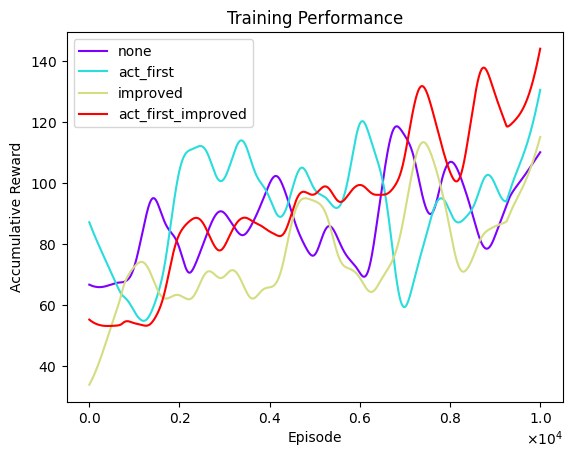

In [209]:

# Specify the path to your CSV file

fig, ax = plt.subplots()

for model in models:
    model.append(pd.read_csv(model[1]))
    df = model[3]
    # df = df[np.abs(stats.zscore(df['Accumulative Reward'])) < 3]
    df['acc_reward_mavg'] = df['acc_reward'].rolling(window=window_size).mean()

    df_s = lowess(df['acc_reward'], df['episode'], frac=frac)

    df['acc_reward_lowess'] = df_s[:, 1]
    
    ax.plot(df['episode'], df['acc_reward' + graph], color=model[2])
    

ax.xaxis.set_major_formatter(formatter())
ax.yaxis.set_major_formatter(formatter())

# Customize the plot
ax.set_title('Training Performance')
ax.set_xlabel('Episode')
ax.set_ylabel('Accumulative Reward')
ax.legend([model[0] for model in models])


if save_models:
    fig.savefig(graph_path + 'training_performance.png')
    
# Show the plot
plt.show()


## Survival Rate

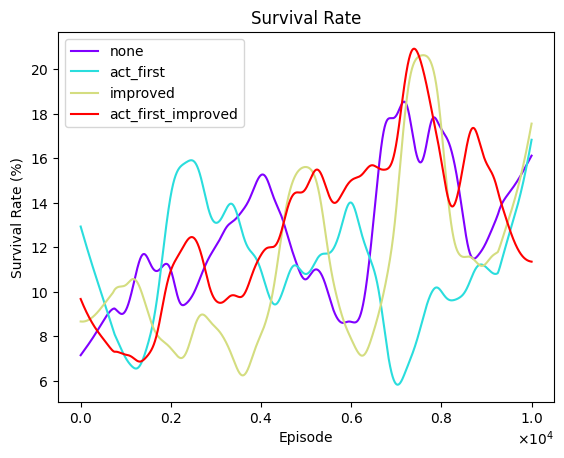

In [210]:
fig, ax = plt.subplots()

for model in models:
    df = model[3]
    df['survival_rate'] = df['length'] / 2016 * 100
    df['survival_rate_mavg'] = df['survival_rate'].rolling(window=window_size).mean()

    df_s = lowess(df['survival_rate'], df['episode'], frac=frac)

    df['survival_rate_lowess'] = df_s[:, 1]
    ax.plot(df['episode'], df['survival_rate' + graph], color=model[2])
    
ax.xaxis.set_major_formatter(formatter())
ax.yaxis.set_major_formatter(formatter())

# Customize the plot
ax.set_title('Survival Rate')
ax.set_xlabel('Episode')
ax.set_ylabel('Survival Rate (%)')
ax.legend([model[0] for model in models])

if save_models:
    fig.savefig(graph_path + 'survival_rate.png')

# Show the plot
plt.show()

## Daily Operating Cost

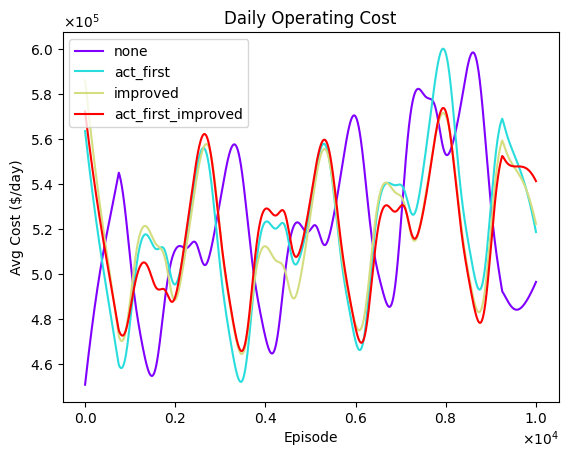

In [211]:
fig, ax = plt.subplots()

for model in models:
    df = model[3]
    # df['Avg Cost'] = df['cost'] / 2016
    df['cost_mavg'] = df['cost'].rolling(window=window_size).mean()

    df_s = lowess(df['cost'], df['episode'], frac=frac)

    df['cost_lowess'] = df_s[:, 1]

    plt.plot(df['episode'], df['cost' + graph], color=model[2])

ax.xaxis.set_major_formatter(formatter())
ax.yaxis.set_major_formatter(formatter())

# Customize the plot
plt.title('Daily Operating Cost')
plt.xlabel('Episode')
plt.ylabel('Avg Cost ($/day)')
plt.legend([model[0] for model in models])

if save_models:
    plt.savefig(graph_path + 'daily_cost.png')

# Show the plot
plt.show()

## Average Wasted Renewable Energy

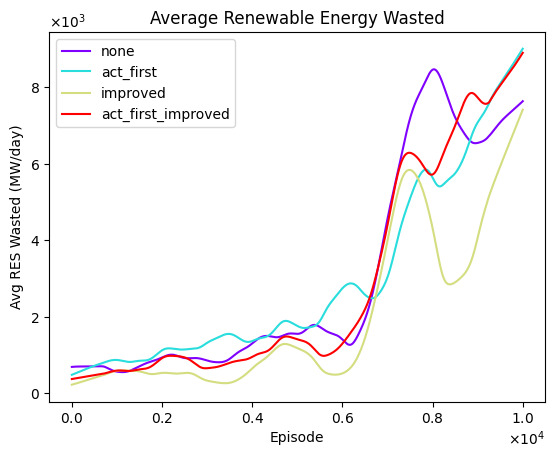

In [212]:
fig, ax = plt.subplots()

for model in models:
    df = model[3]
    df['res_wasted_mavg'] = df['res_wasted'].rolling(window=window_size).mean()

    df_s = lowess(df['res_wasted'], df['episode'], frac=frac)

    df['res_wasted_lowess'] = df_s[:, 1]

    plt.plot(df['episode'], df['res_wasted' + graph], color=model[2])

ax.xaxis.set_major_formatter(formatter())
ax.yaxis.set_major_formatter(formatter())

# Customize the plot
plt.title('Average Renewable Energy Wasted')
plt.xlabel('Episode')
plt.ylabel('Avg RES Wasted (MW/day)')
plt.legend([model[0] for model in models])

if save_models:
    plt.savefig(graph_path + 'res_wasted.png')

# Show the plot
plt.show()